In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gov-data-final.csv")
data.head()

,S No.,Year,State,Industry,Count,Last Update
0,1,2022,Andaman and Nicobar Islands,Agriculture,1,20-11-2022 04:00:02
1,2,2022,Andaman and Nicobar Islands,AR VR (Augmented + Virtual Reality),1,20-11-2022 04:00:02
2,3,2022,Andaman and Nicobar Islands,Construction,1,20-11-2022 04:00:02
3,4,2022,Andaman and Nicobar Islands,Internet of Things,1,20-11-2022 04:00:02
4,5,2022,Andaman and Nicobar Islands,Marketing,1,20-11-2022 04:00:02


In [3]:
print("Data Shape", data.shape)

Data Shape (5920, 6)


In [4]:
print("The number of missing data in counts is ",data['Count'].isnull().sum())

The number of missing data in counts is  0


In [5]:
state_names = data['State'].unique()

def getSamplesByState(sample_sz, no_samples,replace,rand_state):
  sample_arr = []
  sample_means_arr = []

  '''for i in range(no_samples):
    sample = (data['Count'].sample(n=sample_sz,random_state = i).values).tolist()
    sample_arr.append(sample)
    sample_means_arr.append(np.mean(sample))'''


  total_ele = sample_sz * no_samples

  all_samples = data['Count'].sample(n=total_ele,replace=replace,random_state=rand_state).values.tolist()

  for i in range(0,total_ele,sample_sz):
    sample = all_samples[i:i+sample_sz]
    sample_arr.append(sample)
    sample_means_arr.append(np.mean(sample))

  return sample_arr,sample_means_arr

The distribution of Count in the dataset
****************************************************************************************************


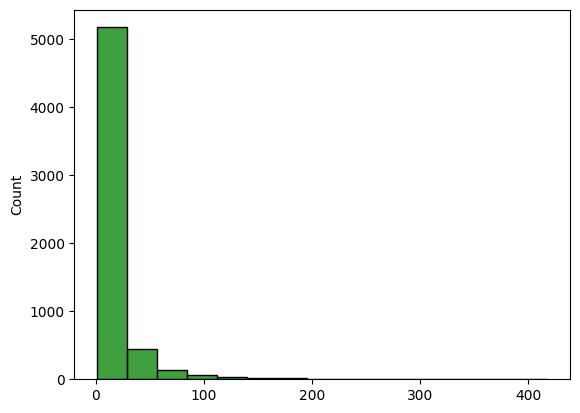

In [6]:
count_data = np.array(data['Count'].values)

sns.histplot(count_data,bins=15,color='g')
print('The distribution of Count in the dataset')
print('*'*100)
warnings.filterwarnings("ignore")
plt.show()

The population mean is :  14.294087837837838
The population std is :  29.233321591023213


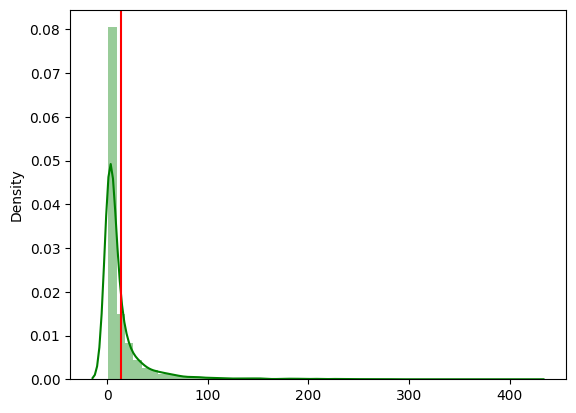

In [20]:
pop_std = data['Count'].std()
pop_mean = data['Count'].mean()
print('The population mean is : ', pop_mean)
print('The population std is : ', pop_std)

sns.distplot(count_data, color = 'g')
plt.axvline(x = np.mean(count_data), color='r')
plt.show()

The PDF of the Count Data as shown in the chart above shows a right skewed figure.
The PDF somewhat looks like a Power law distribution indicating that most of the data points have a lower count with a mean of 14 and there is a decreasing trend of datapoints having a higher count value.


****************************************************************************************************
SAMPLING DISTRIBUTIONS
****************************************************************************************************


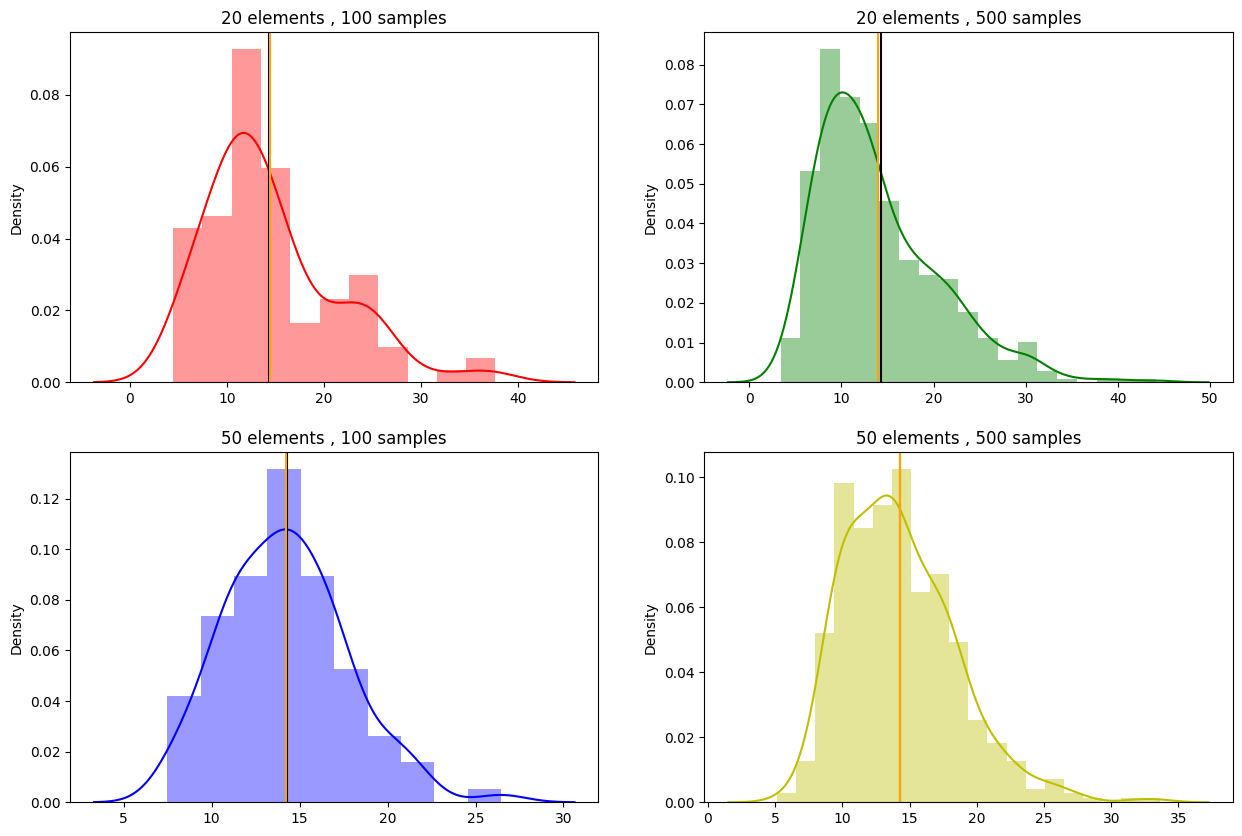

In [34]:
#100 samples with size 50
fig, axs = plt.subplots(2, 2,  figsize=(15, 10))

colors = ['r','g','b','y']


arr_means = []
s, s_mean = getSamplesByState(20, 100,False,1)
arr_means.append(s_mean)
s, s_mean = getSamplesByState(20, 500,True,10)
arr_means.append(s_mean)
s, s_mean = getSamplesByState(50, 100,True,20)
arr_means.append(s_mean)
s, s_mean = getSamplesByState(50, 500,True,2)
arr_means.append(s_mean)

titles=['20 elements , 100 samples','20 elements , 500 samples','50 elements , 100 samples','50 elements , 500 samples']

l=0


print("*"*100)
print('SAMPLING DISTRIBUTIONS')
print("*"*100)

for i in range(2):
  for j in range(2):
    sns.distplot(arr_means[l],color=colors[l], ax = axs[i,j])

    axs[i,j].axvline(pop_mean, linestyle="-", color='black', label="p_mean")
    axs[i,j].axvline(np.mean(arr_means[l]), linestyle="-", color='orange', label="s_mean")
    axs[i, j].set_title(titles[l])
    l = l+1




*   The pandas sampling method is used to generate samples of varying element size and number of samples using sampling with replacement.

*   The means of the generated samples are computed and then their PDF(Probability Distributed Function) is plot. This is called Sampling Distribution of the sample means.

*   The population's PDF is not normally distributed. When we generate 100 samples, each with 50 elements, the sampling distribution of sample means looks normally distributed.

*   For the Central Limit Theorem to work, we have to use reasonably large samples. If the population dataset is not Gaussian, the larger the sample size, the more normally distributed the sampling distribution of sample means will be. The population mean is approximately equal to the mean of the sample distribution.

*   If the population dataset is Gaussian, the sampling distribution of sample means is also normally distrubuted.










**CONFIDENCE INTERVALS**

Confidence Interval is the range of values within which the population mean falls, a certain percentage of time. The percentage of time is called confidence level.
Example: If the confidence interval lies between 10 and 20 with a confidence level of 95%, then we can say that when the mean is computed a 100 times, the mean will fall within the range of 10 to 20, 95 times.

Computation Steps for Confidence Level and Confidence Interval:

The confidence interval is computed using : the mean of the sample distribution, the population/sample standard deviation and the confidence level

${\text{Upper 95%  limit}{\displaystyle ={\bar {x}}+{\text{SD}}\times 1.96}}$ <br>
${\text{Lower 95%  limit}{\displaystyle ={\bar {x}}-{\text{SD}}\times 1.96}}$

${\displaystyle {\bar {x}}} $ is equal to the sample mean, an estimation to population mean<br>
$SD$ is equal to the standard deviation, <br>
$1.96$ is the $0.975$ quantile of the normal distribution or simply z-score of the 97% confidence level <br>




<ul>
    <li>Case 1: Knowing Population Standard Deviation <font color='red'> ${\sigma}$ </font>
    <ol>
        <li>Get a sample of size(<font color='red'> $n$</font>) from population and caculate its mean <font color='red'> $\overline{x}$</font></li>
        <li>Report confidence interval as[<font color='red'> $\overline{x}$- 2*$\frac{\sigma}{\sqrt{n}}$, $\overline{x}$+2*$\frac{\sigma}{\sqrt{n}}$</font>]</li>
    </ol>
</li>
<li>Case 2: Without Knowing Population Standard Deviation
    <ol>
        <li>Get a sample of size(<font color='red'> $n$</font>) from population and caculate its mean <font color='red'> $\overline{x}$</font></li>
        <li>Calculate the sample std <font color='red'>s</font> and find the The standard error of mean or SE mean as  <font color='red'>$\frac{s}{\sqrt{n}}$</font>.</li>
        <li>report confidence interval as[<font color='red'> $\overline{x}$- 2*$\frac{s}{\sqrt{n}}$, $\overline{x}$+2*$\frac{s}{\sqrt{n}}$</font>] or [<font color='red'> $\overline{x}$- 2*SE mean, $\overline{x}$+2*SE mean</font>]</li>
    </ol>
</li>
</ul>



